In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score,mean_squared_error,r2_score,accuracy_score

In [4]:
# selecting required columns for our linear regression model
dataset=pd.read_csv('../datasets/modified_season_stats.csv')
stats_2017 = dataset[dataset['Year']>2016]
X = stats_2017[['PTS','TRB','AST','STL','BLK','FG','G']]
y=stats_2017['PER']
X.shape

(595, 7)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [6]:
from sklearn.preprocessing import StandardScaler
Scaler_x=StandardScaler()
scaled_x=Scaler_x.fit_transform(X_train)
Scaler_y=StandardScaler()
scaled_y=Scaler_y.fit_transform(np.array(y_train).reshape(-1,1))

In [7]:
regression_model = linear_model.LinearRegression()
regression_model.fit(scaled_x,scaled_y)

LinearRegression()

In [8]:
print('Intercept:', regression_model.intercept_)
print('Coefficients:', regression_model.coef_)

Intercept: [2.76652317e-19]
Coefficients: [[ 0.331035    0.23069443  0.10369816 -0.07204955  0.11913799  0.14110962
  -0.21078514]]


In [9]:
y_pred = Scaler_y.inverse_transform ((regression_model.predict(Scaler_x.transform(X_test))))

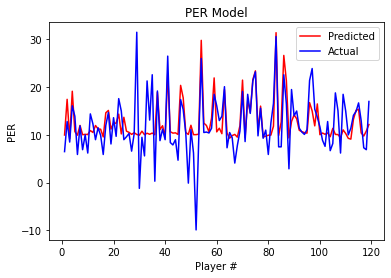

In [10]:
x_for_test=[i+1 for i in range(len(y_test))]
plt.plot(x_for_test,y_pred,color='Red',label="Predicted")
plt.plot(x_for_test,y_test,color='Blue',label="Actual")
plt.xlabel('Player #')
plt.ylabel('PER')
plt.title('PER Model')
plt.legend()
plt.show()

In [11]:
r2_score(y_test,y_pred)

0.4265611978137467

In [12]:
mean_squared_error(y_test,y_pred)

21.526005000533083